In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SimpleRNN, TimeDistributed, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

from IPython.display import Image

import matplotlib.pyplot as plt
import PIL
import numpy as np
import pandas as pd

In [2]:
tf.__version__

'2.9.1'

# Simple Neural Network

In [4]:
# x1 + x2 - x3
Data_x = [
    [ 1.0, 0.8, 0.4 ],
    [ 1.0, 0.8, 0.7 ],
    [ 0.3, 0.1, 0.2 ]
]

Data_y = [
    1.4,
    1.1,
    0.2
]

In [8]:
nFeatures = 3

### Network architecture & Parameters?

In [9]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences (모든 x time-step에 대하여 output을 냄)
model.add(Dense(1, activation='linear', input_shape=( nFeatures, )))

In [10]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[-1.0571662 ],
        [-0.6876704 ],
        [-0.52056295]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [12]:
model.predict(Data_x)

1/1 [==============================] - 0s 80ms/step


array([[-1.8155277],
       [-1.9716966],
       [-0.4900295]], dtype=float32)

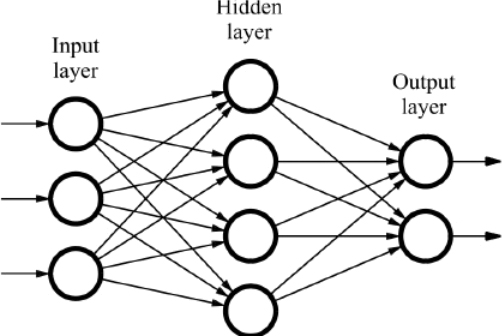

In [8]:
Image('images/neural.jpg')

위 그림에 대한 Layer 형태를 Neural network로 구현하기

In [14]:
nFeatures = 3

model = Sequential()
# RNN. 현재 RNN은 return_sequences (모든 x time-step에 대하여 output을 냄)
model.add(Dense(4, activation='linear', input_shape=( nFeatures, )))
model.add(Dense(2, activation='linear'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 16        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


### model fine-tunning

In [17]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences (모든 x time-step에 대하여 output을 냄)
model.add(Dense(1, activation='linear', input_shape=( nFeatures, )))

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=['mse'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[1.1439761],
        [0.6079203],
        [0.7286242]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [19]:
model.fit(Data_x, Data_y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 236ms/step - loss: 0.4923 - mse: 0.4923
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 0.4540 - mse: 0.4540
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 0.4174 - mse: 0.4174
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 0.3826 - mse: 0.3826
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3495 - mse: 0.3495
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3182 - mse: 0.3182
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2887 - mse: 0.2887
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 0.2611 - mse: 0.2611
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2352 - mse: 0.2352
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2112 - mse: 0.2112
Epoch 11/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1889 - mse: 0.

In [20]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[0.8974406 ],
        [0.3601802 ],
        [0.44784597]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([-0.24246839], dtype=float32)>]

In [22]:
model.predict(Data_x)

1/1 [==============================] - 0s 24ms/step


array([[1.1222548 ],
       [1.2566086 ],
       [0.15235099]], dtype=float32)

In [23]:
Data_y

[1.4, 1.1, 0.2]

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Deep & Wide model, parameters?

In [24]:
nFeatures

3

In [16]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences (모든 x time-step에 대하여 output을 냄)
model.add(Dense(30, activation='linear', input_shape=( nFeatures, )))
model.add(Dense(20, activation='linear'))
model.add(Dense(53, activation='linear'))
model.add(Dense(23, activation='linear'))
model.add(Dense(1, activation='linear'))

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                120       
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 dense_6 (Dense)             (None, 53)                1113      
                                                                 
 dense_7 (Dense)             (None, 23)                1242      
                                                                 
 dense_8 (Dense)             (None, 1)                 24        
                                                                 
Total params: 3,119
Trainable params: 3,119
Non-trainable params: 0
_________________________________________________________________


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# Recurrent Neural Network

## Simple time series data (time = 6, nFeatures = 1)
return_sequences = False
** Many to One **

In [27]:
Data_x = [
    [0.0, 0.0, 0.0, 0.5, 0.5, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

Data_y = [ 
    [1],
    [0]
]

In [28]:
nFeatures = 1
TimeRange = 6

### Model architecture & parameters? return_sequences?

In [31]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences (모든 x time-step에 대하여 output을 냄)
model.add(SimpleRNN(1, activation='linear', return_sequences = False, input_shape=( TimeRange, nFeatures,  )))

In [32]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=['mse'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


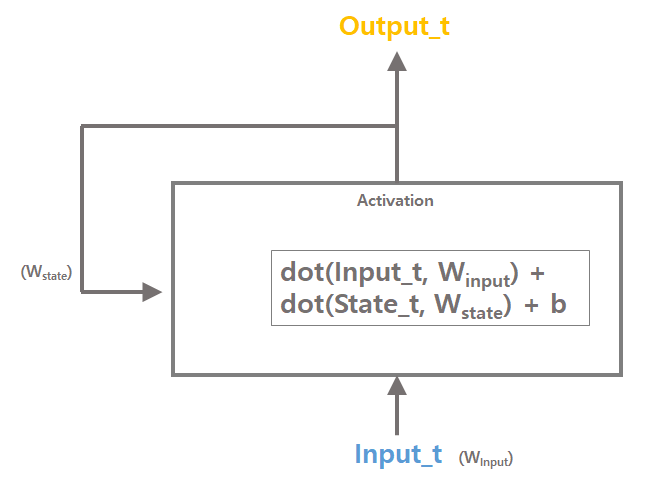

In [33]:
Image('images/rnn.png', width=500)

In [34]:
model.weights

[<tf.Variable 'simple_rnn_1/simple_rnn_cell_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.69124925]], dtype=float32)>,
 <tf.Variable 'simple_rnn_1/simple_rnn_cell_1/recurrent_kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'simple_rnn_1/simple_rnn_cell_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [35]:
model.predict(Data_x)

1/1 [==============================] - 0s 109ms/step


array([[1.3824985],
       [0.       ]], dtype=float32)

In [ ]:
weight: 0.69
Recurrent_kernel weight: 1
bias = 0

        Output
0.0 -> 0.0 * 0.69 + 0 + 0 = 0
0.0 -> 0.0 * 0.69 + 0 + 0 = 0
0.0 -> 0.0 * 0.69 + 0 + 0 = 0
0.5 -> 0.5 * 0.69 + 0 + 0 = 0.345
0.5 -> 0.5 * 0.69 + 0.345 * 1 + 0 = 0.345 + 0.345 = 0.69
1.0 -> 1.0 * 0.69 + 0.69 * 1 + 0 = 0.69 + 0.69 = 1.38

In [36]:
Data_x

[[0.0, 0.0, 0.0, 0.5, 0.5, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

### Fine tunning

In [37]:
model.fit(Data_x, Data_y, epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 497ms/step - loss: 0.0732 - mse: 0.0732
Epoch 2/30
1/1 [==============================] - 0s 4ms/step - loss: 0.0449 - mse: 0.0449
Epoch 3/30
1/1 [==============================] - 0s 4ms/step - loss: 0.0286 - mse: 0.0286
Epoch 4/30
1/1 [==============================] - 0s 5ms/step - loss: 0.0219 - mse: 0.0219
Epoch 5/30
1/1 [==============================] - 0s 4ms/step - loss: 0.0213 - mse: 0.0213
Epoch 6/30
1/1 [==============================] - 0s 4ms/step - loss: 0.0227 - mse: 0.0227
Epoch 7/30
1/1 [==============================] - 0s 10ms/step - loss: 0.0234 - mse: 0.0234
Epoch 8/30
1/1 [==============================] - 0s 5ms/step - loss: 0.0223 - mse: 0.0223
Epoch 9/30
1/1 [==============================] - 0s 6ms/step - loss: 0.0196 - mse: 0.0196
Epoch 10/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0161 - mse: 0.0161
Epoch 11/30
1/1 [==============================] - 0s 6ms/step - loss: 0.0123 - mse: 0

In [38]:
model.weights

[<tf.Variable 'simple_rnn_1/simple_rnn_cell_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.54736775]], dtype=float32)>,
 <tf.Variable 'simple_rnn_1/simple_rnn_cell_1/recurrent_kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.8153097]], dtype=float32)>,
 <tf.Variable 'simple_rnn_1/simple_rnn_cell_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.00286144], dtype=float32)>]

In [39]:
model.predict(Data_x)

1/1 [==============================] - 0s 27ms/step


array([[0.96337324],
       [0.01094249]], dtype=float32)

<br><br><br><br><br><br><br><br><br><br><br><br><br>
# Simple time series data (time = 6, nFeatures = 1)
return_sequences=True
** Many to Many **

In [41]:
Data_x = [
    [0.0, 0.0, 0.0, 0.5, 0.8, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

Data_y = [ 
    [0.0, 0.0, 0.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

In [42]:
nFeatures = 1
TimeRange = 6

In [67]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences (모든 x time-step에 대하여 output을 냄)
model.add(SimpleRNN(1, activation='linear', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))

In [68]:
model.predict(Data_x)

1/1 [==============================] - 0s 107ms/step


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.85494214],
        [2.2228496 ],
        [3.932734  ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]], dtype=float32)

In [69]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=Adam(learning_rate=0.1), metrics=['mse'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_23 (SimpleRNN)   (None, 6, 1)              3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.weights

[<tf.Variable 'simple_rnn_23/simple_rnn_cell_23/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.7098843]], dtype=float32)>,
 <tf.Variable 'simple_rnn_23/simple_rnn_cell_23/recurrent_kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'simple_rnn_23/simple_rnn_cell_23/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [71]:
model.predict(Data_x)

1/1 [==============================] - 0s 112ms/step


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.85494214],
        [2.2228496 ],
        [3.932734  ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]], dtype=float32)

### fine tunning

In [72]:
model.fit(Data_x, Data_y, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 532ms/step - loss: 0.8431 - mse: 0.8431
Epoch 2/30
1/1 [==============================] - 0s 4ms/step - loss: 0.4342 - mse: 0.4342
Epoch 3/30
1/1 [==============================] - 0s 3ms/step - loss: 0.3412 - mse: 0.3412
Epoch 4/30
1/1 [==============================] - 0s 5ms/step - loss: 0.2969 - mse: 0.2969
Epoch 5/30
1/1 [==============================] - 0s 7ms/step - loss: 0.2420 - mse: 0.2420
Epoch 6/30
1/1 [==============================] - 0s 4ms/step - loss: 0.1848 - mse: 0.1848
Epoch 7/30
1/1 [==============================] - 0s 11ms/step - loss: 0.1356 - mse: 0.1356
Epoch 8/30
1/1 [==============================] - 0s 5ms/step - loss: 0.0978 - mse: 0.0978
Epoch 9/30
1/1 [==============================] - 0s 5ms/step - loss: 0.0707 - mse: 0.0707
Epoch 10/30
1/1 [==============================] - 0s 5ms/step - loss: 0.0522 - mse: 0.0522
Epoch 11/30
1/1 [==============================] - 0s 8ms/step - loss: 0.0402 - mse: 0

In [73]:
model.weights

[<tf.Variable 'simple_rnn_23/simple_rnn_cell_23/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0050843]], dtype=float32)>,
 <tf.Variable 'simple_rnn_23/simple_rnn_cell_23/recurrent_kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.28638947]], dtype=float32)>,
 <tf.Variable 'simple_rnn_23/simple_rnn_cell_23/bias:0' shape=(1,) dtype=float32, numpy=array([0.19526242], dtype=float32)>]

In [74]:
model.predict(Data_x)

1/1 [==============================] - 0s 22ms/step


array([[[0.19526242],
        [0.13934132],
        [0.15535653],
        [0.6533121 ],
        [0.81222814],
        [0.96773314]],

       [[0.19526242],
        [0.13934132],
        [0.15535653],
        [0.15076995],
        [0.15208349],
        [0.1517073 ]]], dtype=float32)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# Deep & Wide model parameters?

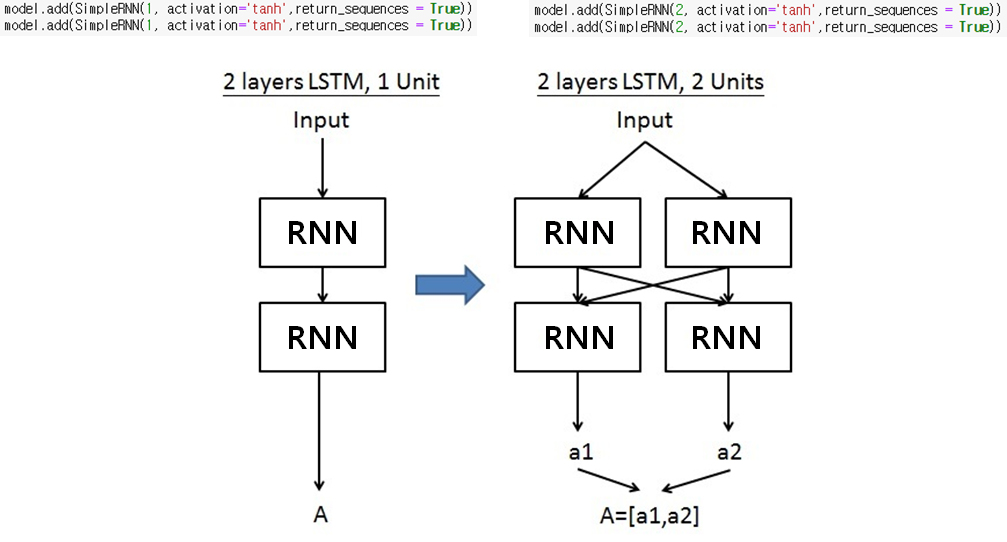

In [39]:
Image('images/RNN_Structure.png')

In [75]:
nFeatures = 3

In [76]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences=False (마지막 x time-step에 대해서만 output을 냄)
model.add(SimpleRNN(1, activation='tanh', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))
model.add(SimpleRNN(1, activation='tanh', return_sequences = True))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_24 (SimpleRNN)   (None, 6, 1)              5         
                                                                 
 simple_rnn_25 (SimpleRNN)   (None, 6, 1)              3         
                                                                 
 dense_13 (Dense)            (None, 6, 1)              2         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [77]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences=False (마지막 x time-step에 대해서만 output을 냄)
model.add(SimpleRNN(2, activation='tanh', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))
model.add(SimpleRNN(2, activation='tanh', return_sequences = True))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_26 (SimpleRNN)   (None, 6, 2)              12        
                                                                 
 simple_rnn_27 (SimpleRNN)   (None, 6, 2)              10        
                                                                 
 dense_14 (Dense)            (None, 6, 1)              3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.predict(Data_x)

1/1 [==============================] - 0s 182ms/step


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.08062696],
        [0.86898124],
        [1.2566038 ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]], dtype=float32)

In [45]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences (모든 x time-step에 대하여 output을 냄)
model.add(SimpleRNN(5, activation='linear', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))
model.add(SimpleRNN(5, activation='linear', return_sequences = False))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 6, 5)              35        
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 5)                 55        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.predict(Data_x)

1/1 [==============================] - 0s 157ms/step


array([[-1.2418404],
       [ 0.       ]], dtype=float32)

<br><br><br><br><br><br><br><br><br>
# Time distributed
non-RNN layer에게 모든 Time에 대하여 output을 전달하고 싶을 때?

In [88]:
Data_x = [
    [0.0, 0.0, 0.0, 0.5, 0.8, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

Data_y = [ 
    [0.0, 0.0, 0.0, 0.8, 0.9, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

In [95]:
nFeatures = 1
model = Sequential()
# RNN. 현재 RNN은 return_sequences=False (마지막 x time-step에 대해서만 output을 냄)
model.add(SimpleRNN(5, activation='linear', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))
model.add(TimeDistributed(Dense(1, activation='linear')))

model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_36 (SimpleRNN)   (None, 6, 5)              35        
                                                                 
 time_distributed_1 (TimeDis  (None, 6, 1)             6         
 tributed)                                                       
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.predict(Data_x)

1/1 [==============================] - 0s 111ms/step


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.01591316],
        [0.05885212],
        [0.23154072]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]], dtype=float32)

In [94]:
Data_y

[[0.0, 0.0, 0.0, 0.8, 0.9, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

**Final output layer의 unit 수가 1임에도 불구하고 Multiple output**

In [50]:
help(TimeDistributed)

Help on class TimeDistributed in module keras.layers.rnn.time_distributed:

class TimeDistributed(keras.layers.rnn.base_wrapper.Wrapper)
 |  TimeDistributed(layer, **kwargs)
 |  
 |  This wrapper allows to apply a layer to every temporal slice of an input.
 |  
 |  Every input should be at least 3D, and the dimension of index one of the
 |  first input will be considered to be the temporal dimension.
 |  
 |  Consider a batch of 32 video samples, where each sample is a 128x128 RGB image
 |  with `channels_last` data format, across 10 timesteps.
 |  The batch input shape is `(32, 10, 128, 128, 3)`.
 |  
 |  You can then use `TimeDistributed` to apply the same `Conv2D` layer to each
 |  of the 10 timesteps, independently:
 |  
 |  >>> inputs = tf.keras.Input(shape=(10, 128, 128, 3))
 |  >>> conv_2d_layer = tf.keras.layers.Conv2D(64, (3, 3))
 |  >>> outputs = tf.keras.layers.TimeDistributed(conv_2d_layer)(inputs)
 |  >>> outputs.shape
 |  TensorShape([None, 10, 126, 126, 64])
 |  
 |  Bec

In [52]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences=False (마지막 x time-step에 대해서만 output을 냄)
model.add(SimpleRNN(5, activation='linear', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))
model.add(TimeDistributed(Dense(1, activation='linear')))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, 6, 5)              35        
                                                                 
 time_distributed_1 (TimeDis  (None, 6, 1)             6         
 tributed)                                                       
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.predict(Data_x)

1/1 [==============================] - 0s 96ms/step


array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.4142066 ],
        [-0.13713083],
        [-0.19968657]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]], dtype=float32)

In [98]:
model1 = Sequential()
# RNN. 현재 RNN은 return_sequences=False (마지막 x time-step에 대해서만 output을 냄)
model1.add(SimpleRNN(5, activation='linear', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))
model1.add(Dense(1, activation='linear'))

model1.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_37 (SimpleRNN)   (None, 6, 5)              35        
                                                                 
 dense_24 (Dense)            (None, 6, 1)              6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


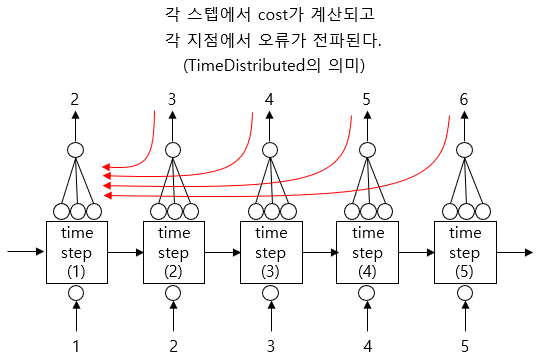

In [56]:
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=chunjein&logNo=221589624838
Image('images/withTD.gif', width=500)

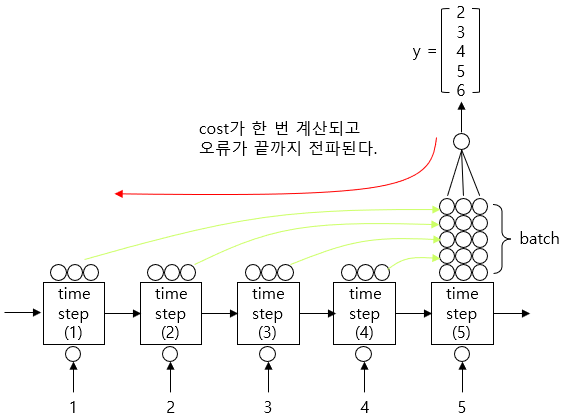

In [57]:
Image('images/withoutTD.gif', width=500)

<br><br><br><br><br><br><br><br><br>
# 2D Convolution

In [104]:
# 이미지 읽기
img = PIL.Image.open('images/SkinCancer.jpg')

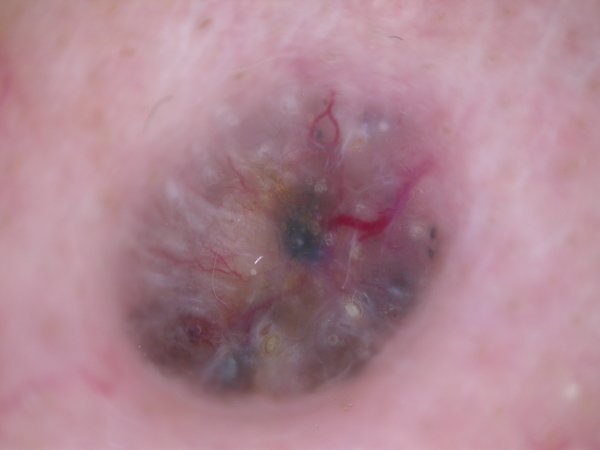

In [105]:
img

In [106]:
np.array(img).shape

(450, 600, 3)

In [107]:
np.array(img)[:5, :5, 1]

array([[120, 122, 123, 122, 122],
       [121, 121, 121, 122, 122],
       [121, 122, 123, 122, 124],
       [121, 121, 120, 121, 124],
       [122, 122, 121, 121, 123]], dtype=uint8)

In [108]:
img = np.array(img.resize([56, 56]))
img.shape

(56, 56, 3)

<br><br><br>
# basic 2D convolution & principles
1-unit CNN-2D

In [109]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(1, (3, 3), activation='linear', input_shape=(56, 56, 3,)))
model = Model(inputs=model.input, outputs=model.output)

In [110]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1_input (InputLayer)  [(None, 56, 56, 3)]      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 1)         28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


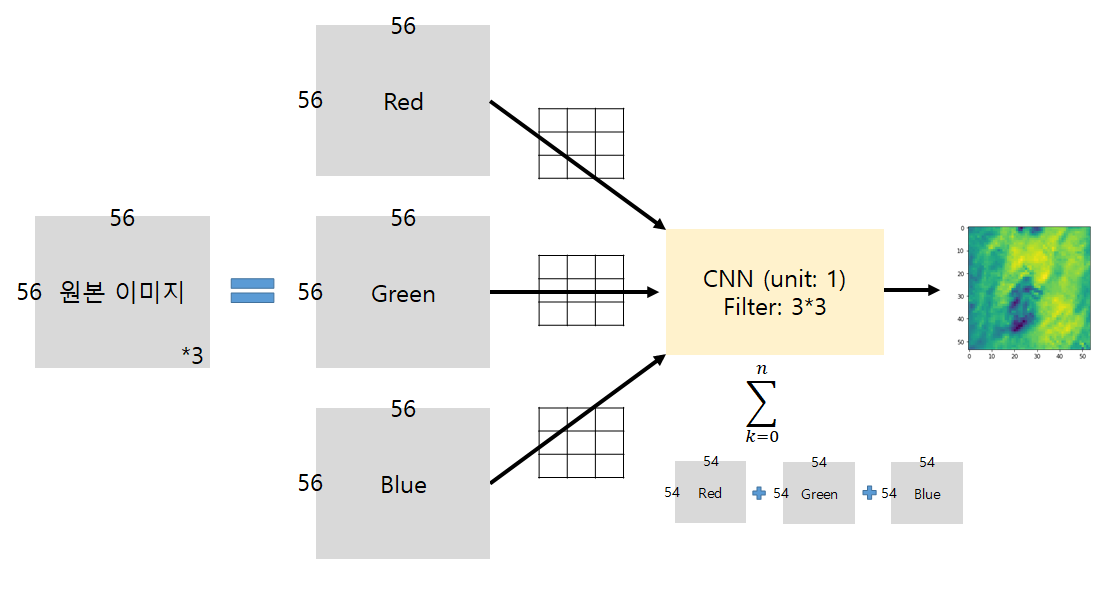

In [111]:
Image('images/CNN.png')

In [112]:
img[np.newaxis, :].shape

(1, 56, 56, 3)

In [113]:
Predicted = model.predict(img[np.newaxis, :])
Predicted.shape

1/1 [==============================] - 0s 31ms/step


(1, 54, 54, 1)

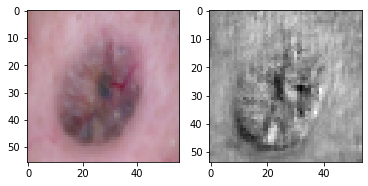

In [114]:
fig = plt.figure(figsize=(6, 3))

fig.add_subplot(1, 2, 1) # row, column, n번째 image
plt.imshow(img, interpolation='nearest')

fig.add_subplot(1, 2, 2)
plt.imshow(Predicted[0], interpolation='nearest', cmap = 'gray')

### pooling layer

In [116]:
# Pooling이 있는 모델의 경우
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

In [117]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5_input (InputLayer)  [(None, 56, 56, 3)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 5)         140       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 5)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 5)         230       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 5)        0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 5)                0   

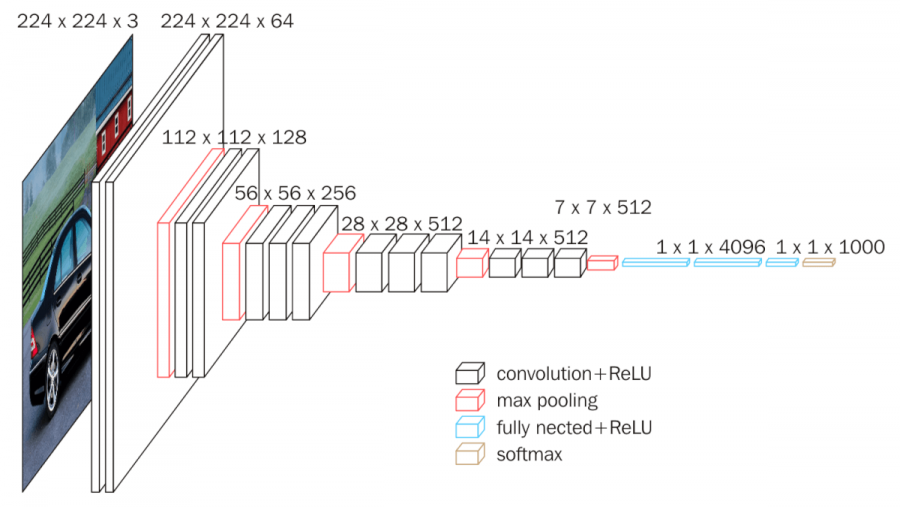

In [118]:
Image('images/VGG.png')

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# 1D Convolution

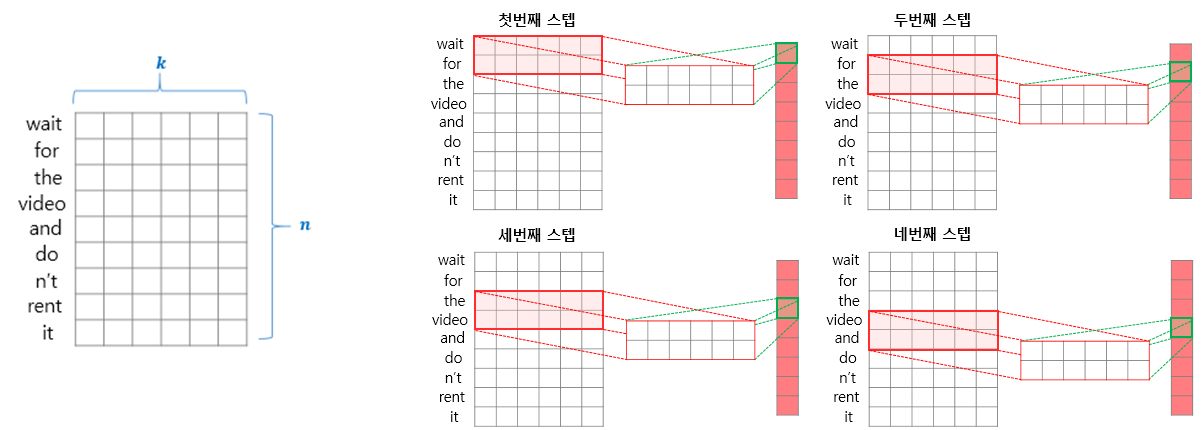

In [119]:
Image('images/CNN1D.png')

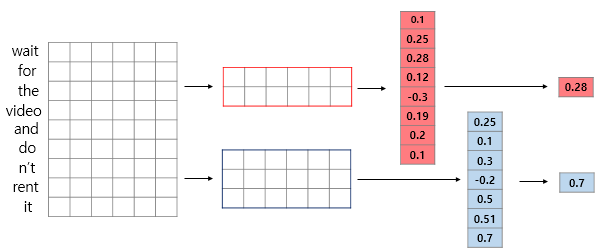

In [120]:
Image('images/MaxPooling.png')

**nFeature: 1**<br>
**Kernel_size = 3**

In [121]:
Data_x = [
    [0.0, 0.0, 0.0, 0.5, 0.8, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

Data_y = [ 
    [0.0, 0.0, 0.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

In [115]:
TimeRange = 6
nFeatures = 1

In [119]:
num_filters = 3
kernel_size = 3

In [120]:
model = Sequential()
model.add(tf.keras.layers.Conv1D(num_filters, kernel_size, padding='valid', activation='relu', input_shape=( TimeRange, nFeatures,  )  ))

In [121]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 3)              12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.weights

[<tf.Variable 'conv1d_1/kernel:0' shape=(3, 1, 3) dtype=float32, numpy=
 array([[[-0.01607162, -0.01149309,  0.229043  ]],
 
        [[ 0.6392614 ,  0.6673439 , -0.49041432]],
 
        [[ 0.22816634,  0.6377111 ,  0.37772304]]], dtype=float32)>,
 <tf.Variable 'conv1d_1/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [124]:
model.predict(Data_x).shape

1/1 [==============================] - 0s 25ms/step


(2, 4, 3)

<br><br><br><br><br><br><br><br><br><br><br>
**nFeature: 2**<br>
**Kernel_size = 3**

In [125]:
Data_x = [
    [[0, 0],[0, 0],[0, 0],[.5,0],[0,.5],[1, 1]],
    [[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0]]
]

Data_y = [ 
    [0.0, 0.0, 0.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

In [126]:
TimeRange = 6
nFeatures = 2

In [130]:
num_filters = 1
kernel_size = 2

In [133]:
model = Sequential()
model.add(tf.keras.layers.Conv1D(num_filters, kernel_size, padding='valid', activation='relu', input_shape=( TimeRange, nFeatures,  )  ))

In [134]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 5, 1)              5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [135]:
model.weights

[<tf.Variable 'conv1d_4/kernel:0' shape=(2, 2, 1) dtype=float32, numpy=
 array([[[-0.8871074 ],
         [-0.40986872]],
 
        [[ 0.40002275],
         [ 0.4515257 ]]], dtype=float32)>,
 <tf.Variable 'conv1d_4/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [136]:
model.predict(Data_x)

1/1 [==============================] - 0s 46ms/step


array([[[0.        ],
        [0.        ],
        [0.20001137],
        [0.        ],
        [0.6466141 ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]], dtype=float32)

<br><br><br><br><br><br><br><br><br><br><br>
**num_filters = 5**<br>
**nFeature: 2**<br>
**Kernel_size = 3**

In [137]:
num_filters = 5
nFeatures = 2
kernel_size = 3

In [141]:
nFeatures

2

In [138]:
model = Sequential()
model.add(tf.keras.layers.Conv1D(num_filters, kernel_size, padding='valid', activation='relu', input_shape=( TimeRange, nFeatures,  )  ))

In [139]:
model.summary(0)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 4, 5)              35        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.predict(Data_x)

1/1 [==============================] - 0s 29ms/step


array([[[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.17425266, 0.        , 0.        , 0.        , 0.05256057],
        [0.        , 0.        , 0.        , 0.        , 0.05566742],
        [0.        , 0.25372073, 0.        , 0.        , 0.04954238]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]],
      dtype=float32)

In [143]:
model.predict(Data_x).shape

1/1 [==============================] - 0s 28ms/step


(2, 4, 5)